## Data Cleaning
Removal of unwanted attributes and handling missing values

In [1]:
# Load required packages
import pandas as pd
import os

In [2]:
# Set environment
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 

In [3]:
# Load data frame
df_fifa = pd.read_csv('players_21.csv')
df_fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [4]:
# Total rows and columns in the data frame
df_fifa.shape

(18944, 106)

## Feature Engineering
Selection of player's name and only numeric attributes into new data frame

In [5]:
# Check column names with only numeric variables
df_fifa.describe().columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [6]:
# Create new data frame with selected columns
df_new = df_fifa[['short_name', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 
              'international_reputation', 'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
              'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
              'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 
              'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
              'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
              'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
              'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
              'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
              'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 
              'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
df_new.head()

,short_name,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,1.0,93,93,67500000,560000,5,...,75,96,NaN,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,1.0,92,92,46000000,220000,5,...,84,95,NaN,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,1.0,91,93,75000000,125000,3,...,11,68,NaN,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,1.0,91,91,80000000,240000,4,...,88,88,NaN,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,1.0,91,91,90000000,270000,5,...,92,93,NaN,30,29,9,9,15,15,11


In [7]:
# Total rows and columns in the data frame
df_new.shape

(18944, 62)

In [8]:
# Extract players who have overall over 85
df = df_new[df_new.overall > 85]
df.shape

(62, 62)

In [9]:
# Total missing values for each feature
pd.set_option('display.max_rows', 62)
df.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
league_rank                    0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          25
pace                          12
shooting                      12
passing                       12
dribbling                     12
defending                     12
physic                        12
gk_diving                     50
gk_handling                   50
gk_kicking                    50
gk_reflexes                   50
gk_speed                      50
gk_positioning                50
attacking_crossing             0
attacking_finishing            0
attacking_

In [10]:
# Replace missing values with mean values
df = df.fillna(df.mean())

# Check the updated data frame
pd.set_option('display.max_rows', 62)
df.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
league_rank                    0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number           0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
gk_diving                      0
gk_handling                    0
gk_kicking                     0
gk_reflexes                    0
gk_speed                       0
gk_positioning                 0
attacking_crossing             0
attacking_finishing            0
attacking_

In [11]:
# Drop the entire defending_marking column
df = df.drop('defending_marking', axis = 1)

## Visualization
Box plots of players physical characteristics and income who have overall above 85

In [12]:
# Load required packages
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

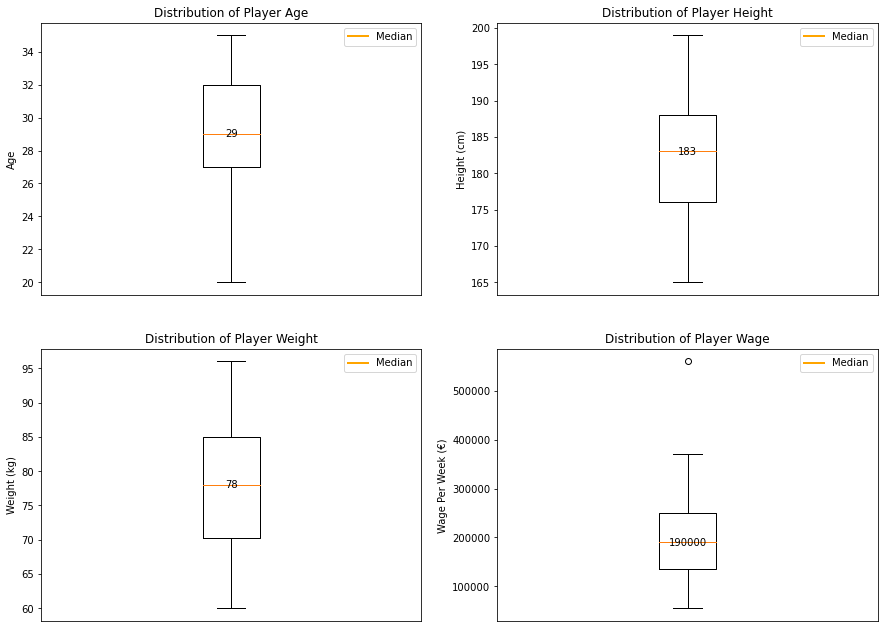

In [13]:
# Create histogram distribution of selected columns
age = df[['age']]
height = df[['height_cm']]
weight = df[['weight_kg']]
wage = df[['wage_eur']]

# Set subplots for four data
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 11))

# Set custom lines
custom_lines = [Line2D([0], [0], color = 'orange', lw = 2)]

# Create first plot
ax1.boxplot(x = age)
ax1.set_xticklabels([])
ax1.tick_params(bottom = False)
ax1.set_title('Distribution of Player Age')
ax1.set_ylabel('Age')
ax1.legend(custom_lines, ['Median'])
for s, x, y in zip(age.median().map('{:0.0f}'.format), np.arange(age.shape[0]) + 1, age.median()):
    ax1.text(x, y, s, va='center', ha='center')
           
# Create second plot
ax2.boxplot(x = height)
ax2.set_xticklabels([])
ax2.tick_params(bottom = False)
ax2.set_title('Distribution of Player Height')
ax2.set_ylabel('Height (cm)')
ax2.legend(custom_lines, ['Median'])
for s, x, y in zip(height.median().map('{:0.0f}'.format), np.arange(height.shape[0]) + 1, height.median()):
    ax2.text(x, y, s, va='center', ha='center')
            
# Create third plot
ax3.boxplot(x = weight)
ax3.set_xticklabels([])
ax3.tick_params(bottom = False)
ax3.set_title('Distribution of Player Weight')
ax3.set_ylabel('Weight (kg)')
ax3.legend(custom_lines, ['Median'])
for s, x, y in zip(weight.median().map('{:0.0f}'.format), np.arange(weight.shape[0]) + 1, weight.median()):
    ax3.text(x, y, s, va='center', ha='center')
            
# Create first plot
ax4.boxplot(x = wage)
ax4.set_xticklabels([])
ax4.tick_params(bottom = False)
ax4.set_title('Distribution of Player Wage')
ax4.set_ylabel('Wage Per Week (€)')
ax4.legend(custom_lines, ['Median'])
for s, x, y in zip(wage.median().map('{:0.0f}'.format), np.arange(wage.shape[0]) + 1, wage.median()):
    ax4.text(x, y, s, va='center', ha='center')

## Data Normalization
Scales each input variable separately to the range 0-1

In [14]:
# load required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [15]:
# Create short_name into name for later analysis
names = df.short_name.tolist()

# Drop short_name column
df = df.drop(['short_name'], axis = 1)
df.head()

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,33,170,72,1.0,93,93,67500000,560000,5,4,...,95,75,96,35,24,6,11,15,14,8
1,35,187,83,1.0,92,92,46000000,220000,5,4,...,82,84,95,32,24,7,11,15,14,11
2,27,188,87,1.0,91,93,75000000,125000,3,3,...,65,11,68,12,18,87,92,78,90,90
3,31,184,80,1.0,91,91,80000000,240000,4,4,...,79,88,88,42,19,15,6,12,8,10
4,28,175,68,1.0,91,91,90000000,270000,5,5,...,90,92,93,30,29,9,9,15,15,11


In [16]:
# Perform normalization in data
x = df.values

# Fit scaler on data
norm = MinMaxScaler().fit(x)

# Transform data
x_scaled = norm.transform(x)

# Store into pandas data frame
x_norm = pd.DataFrame(x_scaled)
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.866667,0.147059,0.333333,0.0,1.000000,0.777778,0.577778,1.000000,1.000000,0.75,...,1.000000,0.790123,1.000000,0.301205,0.195122,0.034483,0.089888,0.142857,0.114943,0.057471
1,1.000000,0.647059,0.638889,0.0,0.857143,0.666667,0.338889,0.326733,1.000000,0.75,...,0.800000,0.901235,0.974359,0.265060,0.195122,0.045977,0.089888,0.142857,0.114943,0.091954
2,0.466667,0.676471,0.750000,0.0,0.714286,0.777778,0.661111,0.138614,0.333333,0.50,...,0.538462,0.000000,0.282051,0.024096,0.121951,0.965517,1.000000,0.835165,0.988506,1.000000
3,0.733333,0.558824,0.555556,0.0,0.714286,0.555556,0.716667,0.366337,0.666667,0.75,...,0.753846,0.950617,0.794872,0.385542,0.134146,0.137931,0.033708,0.109890,0.045977,0.080460
4,0.533333,0.294118,0.222222,0.0,0.714286,0.555556,0.827778,0.425743,1.000000,1.00,...,0.923077,1.000000,0.923077,0.240964,0.256098,0.068966,0.067416,0.142857,0.126437,0.091954


## Principal Component Analysis (PCA)
Dimensionality reduction by projecting each data point onto only the first few principal components

In [17]:
# Set PCA to number of components = 2
pca = PCA(n_components = 2)
df_reduced = pd.DataFrame(pca.fit_transform(x_norm))

## K-Means Clustering
Allocation of data point to the nearest cluster while keeping the centroids as small as possible

In [18]:
# Build clusters model and calculate inertia
inertias = []
mapping1 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(df_reduced)
    kmeanModel.fit(df_reduced)
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = kmeanModel.inertia_

In [19]:
# Tabulate the results
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 176.81694388994458
2 : 47.44547198283023
3 : 13.598294421202613
4 : 7.874431620248579
5 : 4.844988738721061
6 : 3.8608202961391576
7 : 3.176257759269127
8 : 2.6068075687180032
9 : 2.049962739467354


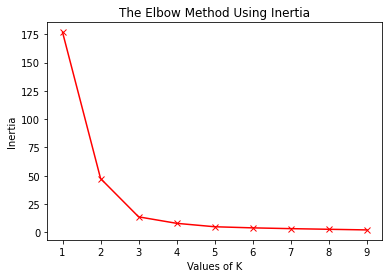

In [20]:
# Visualize the elbow method to determine number of clusters
plt.plot(K, inertias, 'bx-', color = 'r')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method Using Inertia')
plt.show()

In [21]:
# Perform k-means clustering with 4 cluster numbers
kmeans = KMeans(n_clusters = 4)

# Fit the input data
kmeans = kmeans.fit(df_reduced)

# Get the cluster labels
labels = kmeans.predict(df_reduced)

# Get the centroid values
centroid = kmeans.cluster_centers_

# Get the cluster values
clusters = kmeans.labels_.tolist()

In [22]:
# Create new data frame by adding player's names and cluster values
df_reduced['clusters'] = clusters
df_reduced['name'] = names
df_reduced.columns = ['x', 'y', 'cluster', 'name']
df_reduced.head(15)

,x,y,cluster,name
0,-1.333865,-1.338417,0,L. Messi
1,-1.108930,-0.972901,0,Cristiano Ronaldo
2,2.948567,-0.557769,1,J. Oblak
3,-0.986294,-0.605106,0,R. Lewandowski
4,-1.246090,-1.366755,0,Neymar Jr
5,-1.226747,-0.351199,0,K. De Bruyne
6,-1.098971,-1.030507,0,K. Mbappé
7,2.803067,-0.457752,1,M. ter Stegen
8,-0.152145,1.205788,2,V. van Dijk
9,2.950836,-0.498928,1,Alisson


## Visualization
Scatter plot for creating a visualization of K-means clustering results

In [23]:
# Load required packages
import seaborn as sns

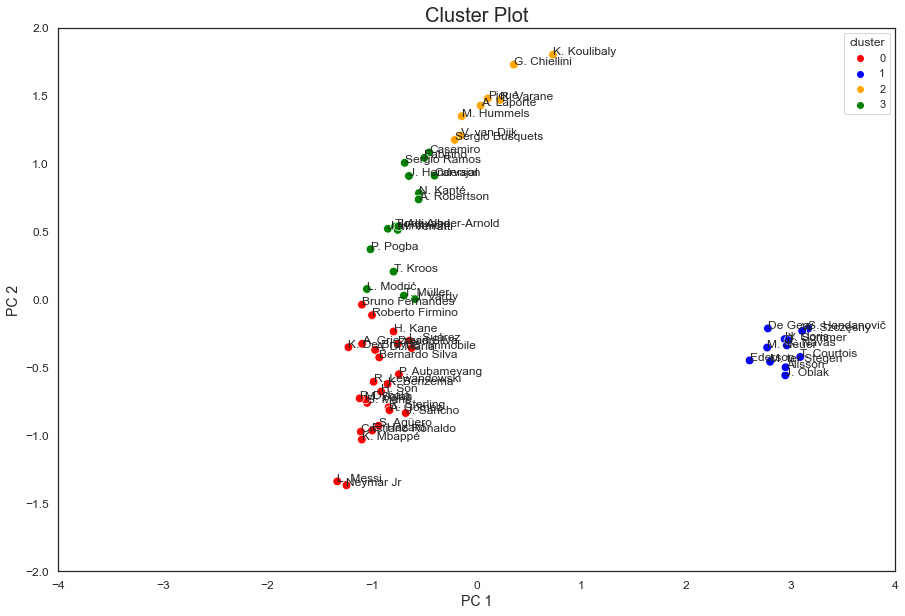

In [26]:
# Visualize the clusters model
sns.set(style = 'white', rc = {'figure.figsize': (15, 10)})

colors = ['red', 'blue', 'orange', 'green']
ax5 = sns.scatterplot(x = 'x', y = 'y', hue = 'cluster', data = df_reduced, palette= colors, s = 75)

text = []
for x, y, s in zip(df_reduced.x, df_reduced.y, df_reduced.name):
    text.append(plt.text(x, y, s))

ax5.set(xlim = (-4, 4))
ax5.set(ylim = (-2, 2))
plt.tick_params(labelsize = 12)
plt.title('Cluster Plot', fontsize = 20)
plt.xlabel('PC 1', fontsize = 14)
plt.ylabel('PC 2', fontsize = 14)
plt.show()